In [1]:
import sqlite3

In [2]:
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

In [3]:
cur.execute("""SELECT *
                FROM matches
                LIMIT 10""")

In [4]:
cur.fetchall()

[(1, 'D2', 2009, '2010-04-04', 'Oberhausen', 'Kaiserslautern', 2, 1, 'H'),
 (2, 'D2', 2009, '2009-11-01', 'Munich 1860', 'Kaiserslautern', 0, 1, 'A'),
 (3, 'D2', 2009, '2009-10-04', 'Frankfurt FSV', 'Kaiserslautern', 1, 1, 'D'),
 (4, 'D2', 2009, '2010-02-21', 'Frankfurt FSV', 'Karlsruhe', 2, 1, 'H'),
 (5, 'D2', 2009, '2009-12-06', 'Ahlen', 'Karlsruhe', 1, 3, 'A'),
 (6, 'D2', 2009, '2010-04-03', 'Union Berlin', 'Karlsruhe', 1, 1, 'D'),
 (7, 'D2', 2009, '2009-08-14', 'Paderborn', 'Karlsruhe', 2, 0, 'H'),
 (8, 'D2', 2009, '2010-03-08', 'Bielefeld', 'Karlsruhe', 0, 1, 'A'),
 (9, 'D2', 2009, '2009-09-26', 'Kaiserslautern', 'Karlsruhe', 2, 0, 'H'),
 (10, 'D2', 2009, '2009-11-21', 'Hansa Rostock', 'Karlsruhe', 2, 1, 'H')]

In [5]:
from pandasql import sqldf

In [6]:
pysqldf = lambda q: sqldf(q, globals())

In [7]:
import pandas as pd

In [8]:
cur.execute("""SELECT * FROM matches LIMIT 10;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [9]:
cur.execute("""SELECT * FROM teams WHERE Season== 2011 ;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.TeamName.nunique()

36

In [10]:
cur.execute("""SELECT * FROM unique_teams ;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5
...,...,...
123,Burnley,124
124,Blackpool,125
125,Swansea,126
126,Cardiff,127


In [18]:
cur.execute("""SELECT * FROM Teams_in_Matches ;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26


In [19]:
cur.execute("""SELECT * FROM FlatView ;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head(10)

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,AvgAgeHome,...,ForeignPlayersHome,ForeignplayersAways,KaderHome,KaderAway,StadiumCapacity,StadiumCapacityAway,AvgMarketValueHome,MarketValueAway,OverallMarketValueHome,OverallMarketValueAway
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H,25,...,8,13,29,32,47728,47728,305000,747000,8850000,23900000
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A,24,...,18,13,33,32,47728,47728,658000,747000,21700000,23900000
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D,26,...,20,13,34,32,47728,47728,385000,747000,13100000,23900000
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H,26,...,20,9,34,37,47728,47728,385000,570000,13100000,21100000
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A,25,...,14,9,37,37,47728,47728,349000,570000,12930000,21100000
5,6,D2,2009,2010-04-03,Union Berlin,Karlsruhe,1,1,D,25,...,8,9,29,37,47728,47728,327000,570000,9480000,21100000
6,7,D2,2009,2009-08-14,Paderborn,Karlsruhe,2,0,H,25,...,6,9,31,37,47728,47728,309000,570000,9580000,21100000
7,8,D2,2009,2010-03-08,Bielefeld,Karlsruhe,0,1,A,25,...,15,9,31,37,47728,47728,883000,570000,27380000,21100000
8,9,D2,2009,2009-09-26,Kaiserslautern,Karlsruhe,2,0,H,23,...,13,9,32,37,47728,47728,747000,570000,23900000,21100000
9,10,D2,2009,2009-11-21,Hansa Rostock,Karlsruhe,2,1,H,25,...,8,9,31,37,47728,47728,665000,570000,20630000,21100000


In [20]:
cur.execute("""SELECT * FROM matches LIMIT 10;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [189]:
cur.execute("""SELECT HomeTeam as Team, sum(FTHG) as homegoals, Season, Div,
               FROM matches 
               WHERE Season == 2011
               GROUP BY 1;
               """)
dfh = pd.DataFrame(cur.fetchall())
dfh.columns = [x[0] for x in cur.description]
dfh.head()

OperationalError: near "FROM": syntax error

In [176]:
cur.execute("""SELECT AwayTeam as Team, sum(FTAG) as awaygoals, Season, Div, FTR
               FROM matches 
               WHERE Season == 2011
               GROUP BY 1;
               """)
dfa = pd.DataFrame(cur.fetchall())
dfa.columns = [x[0] for x in cur.description]
dfa.head()

,Team,awaygoals,Season,Div,FTR
0,Aachen,15,2011,D2,H
1,Arsenal,35,2011,E0,D
2,Aston Villa,17,2011,E0,D
3,Augsburg,16,2011,D1,H
4,Bayern Munich,28,2011,D1,A


In [177]:
combine = pd.merge(dfh, dfa, how='inner', on=['Team'])
combine.head()


,Team,homegoals,Season_x,Div_x,FTR_x,awaygoals,Season_y,Div_y,FTR_y
0,Aachen,15,2011,D2,A,15,2011,D2,H
1,Arsenal,39,2011,E0,A,35,2011,E0,D
2,Aston Villa,20,2011,E0,H,17,2011,E0,D
3,Augsburg,20,2011,D1,A,16,2011,D1,H
4,Bayern Munich,49,2011,D1,A,28,2011,D1,A


In [178]:
combine['total_goals'] = combine.apply(lambda x: x['homegoals'] + x['awaygoals'], axis=1)
combine.head()

,Team,homegoals,Season_x,Div_x,FTR_x,awaygoals,Season_y,Div_y,FTR_y,total_goals
0,Aachen,15,2011,D2,A,15,2011,D2,H,30
1,Arsenal,39,2011,E0,A,35,2011,E0,D,74
2,Aston Villa,20,2011,E0,H,17,2011,E0,D,37
3,Augsburg,20,2011,D1,A,16,2011,D1,H,36
4,Bayern Munich,49,2011,D1,A,28,2011,D1,A,77


In [28]:
cur.execute("""SELECT * FROM matches WHERE Season == 2011;""")
mdf = pd.DataFrame(cur.fetchall())
mdf.columns = [x[0] for x in cur.description]
mdf.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [179]:
wins=[]
for x in range(0,len(mdf)):
    if mdf.FTR[x]== 'H':
        wins.append(mdf.HomeTeam[x])
    elif mdf.FTR[x]=='A':
        wins.append(mdf.AwayTeam[x])

In [180]:
num_of_wins=[]
for x in combine['Team']:
    num_of_wins.append(wins.count(x))

In [181]:
combine['num_of_wins']=num_of_wins

In [182]:
combine.head()

,Team,homegoals,Season_x,Div_x,FTR_x,awaygoals,Season_y,Div_y,FTR_y,total_goals,num_of_wins
0,Aachen,15,2011,D2,A,15,2011,D2,H,30,6
1,Arsenal,39,2011,E0,A,35,2011,E0,D,74,21
2,Aston Villa,20,2011,E0,H,17,2011,E0,D,37,7
3,Augsburg,20,2011,D1,A,16,2011,D1,H,36,8
4,Bayern Munich,49,2011,D1,A,28,2011,D1,A,77,23


In [183]:
lost=[]
for x in range(0,len(mdf)):
    if mdf.FTR[x]== 'A':
        lost.append(mdf.HomeTeam[x])
    elif mdf.FTR[x]=='H':
        lost.append(mdf.AwayTeam[x])

In [184]:
num_of_lost=[]
for x in combine['Team']:
    num_of_lost.append(lost.count(x))

In [185]:
combine['num_of_lost']=num_of_lost

In [186]:
combine.head()

,Team,homegoals,Season_x,Div_x,FTR_x,awaygoals,Season_y,Div_y,FTR_y,total_goals,num_of_wins,num_of_lost
0,Aachen,15,2011,D2,A,15,2011,D2,H,30,6,15
1,Arsenal,39,2011,E0,A,35,2011,E0,D,74,21,10
2,Aston Villa,20,2011,E0,H,17,2011,E0,D,37,7,14
3,Augsburg,20,2011,D1,A,16,2011,D1,H,36,8,12
4,Bayern Munich,49,2011,D1,A,28,2011,D1,A,77,23,7


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

Text(0, 0.5, 'Team')

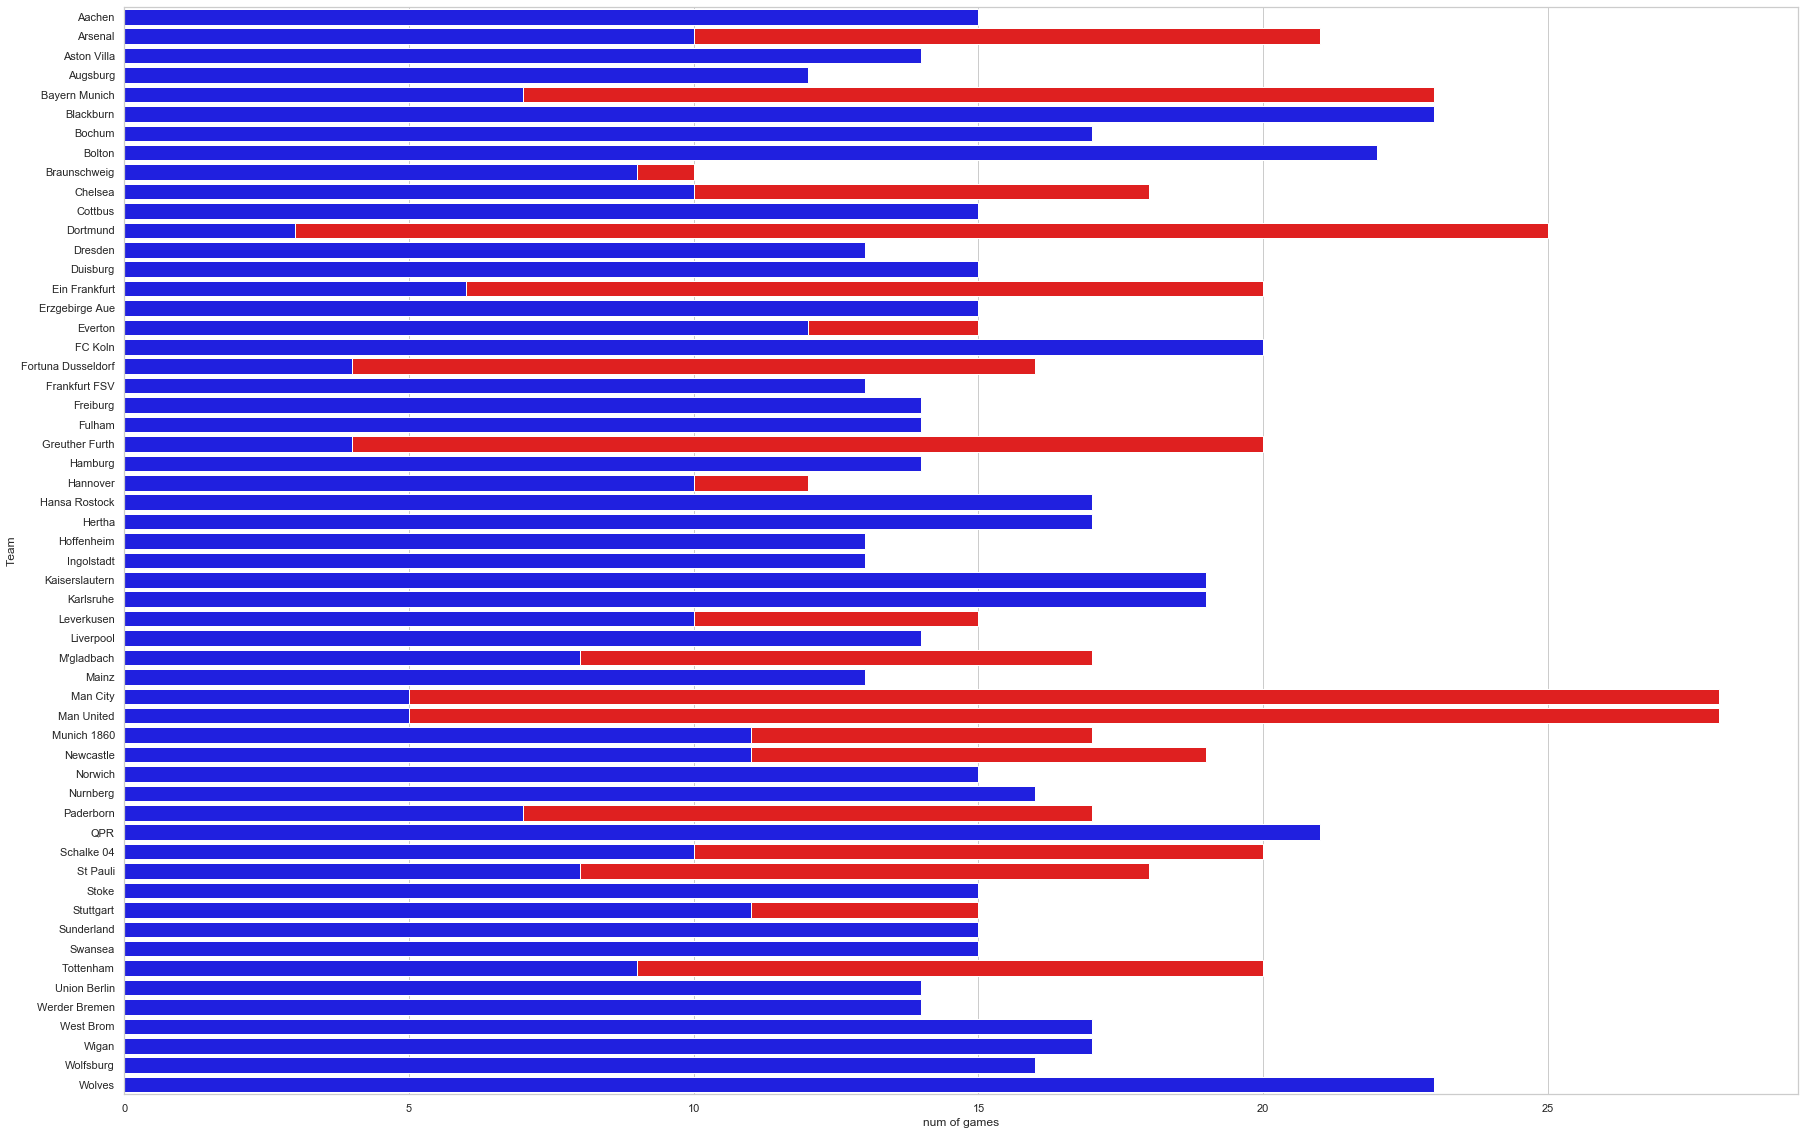

In [38]:
plt.figure(figsize=(30,20))
ax = sns.barplot(x="num_of_wins", y="Team", data=combine, color='red')
ax2=sns.barplot(x="num_of_lost", y="Team", data=combine, color='blue')
plt.xlabel('num of games')
plt.ylabel('Team')

In [39]:
mdf.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [89]:
uniquedate= mdf.Date.unique()
len(uniquedate)

165

In [90]:
Date = list(uniquedate)

In [91]:
Date[:10]

['2012-03-31',
 '2011-12-11',
 '2011-08-13',
 '2011-11-27',
 '2012-02-18',
 '2012-01-20',
 '2012-02-04',
 '2012-04-21',
 '2011-09-18',
 '2011-10-23']

In [76]:
import requests
from dotenv import load_dotenv
load_dotenv()
import os

In [77]:
token = os.getenv('DATAKEY')
token

'26632b243324e214f9382d876dd9a656'

In [87]:
resp = requests.get('https://api.darksky.net/forecast/{}/52.5200,13.4050,2011-11-12T15:00:00?=currently,flags'.format(token))
resp.json()


{'latitude': 52.52,
 'longitude': 13.405,
 'timezone': 'Europe/Berlin',
 'currently': {'time': 1321106400,
  'summary': 'Clear',
  'precipIntensity': 0,
  'precipProbability': 0,
  'temperature': 44.51,
  'apparentTemperature': 40.06,
  'dewPoint': 32.81,
  'humidity': 0.63,
  'windSpeed': 8.05,
  'windGust': 10.01,
  'windBearing': 131,
  'visibility': 6.206},
 'hourly': {'summary': 'Clear throughout the day.',
  'data': [{'time': 1321052400,
    'summary': 'Clear',
    'precipIntensity': 0,
    'precipProbability': 0,
    'temperature': 32.41,
    'apparentTemperature': 24.24,
    'dewPoint': 26.62,
    'humidity': 0.79,
    'windSpeed': 10.01,
    'windGust': 10.01,
    'windBearing': 110,
    'uvIndex': 0,
    'visibility': 6.206},
   {'time': 1321056000,
    'summary': 'Clear',
    'precipIntensity': 0,
    'precipProbability': 0,
    'temperature': 31.54,
    'apparentTemperature': 25.01,
    'dewPoint': 26.8,
    'humidity': 0.82,
    'windSpeed': 6.91,
    'windGust': 7.99,
   

In [79]:
resp = requests.get('https://api.darksky.net/forecast/{}/52.5200,13.4050,2011-12-11T15:00:00?=currently,flags'.format(token))
result= resp.json()

In [80]:
resp.status_code

200

In [81]:
result.keys()

dict_keys(['latitude', 'longitude', 'timezone', 'currently', 'hourly', 'daily', 'flags', 'offset'])

In [82]:
result['daily'].keys

<function dict.keys>

In [83]:
result['daily']

{'data': [{'time': 1323558000,
   'summary': 'Mostly cloudy throughout the day.',
   'icon': 'partly-cloudy-day',
   'sunriseTime': 1323587280,
   'sunsetTime': 1323615240,
   'moonPhase': 0.54,
   'precipIntensity': 0,
   'precipIntensityMax': 0,
   'precipProbability': 0,
   'temperatureHigh': 41.54,
   'temperatureHighTime': 1323605040,
   'temperatureLow': 30.55,
   'temperatureLowTime': 1323654360,
   'apparentTemperatureHigh': 34.94,
   'apparentTemperatureHighTime': 1323605040,
   'apparentTemperatureLow': 23.2,
   'apparentTemperatureLowTime': 1323658860,
   'dewPoint': 29.25,
   'humidity': 0.77,
   'windSpeed': 9.66,
   'windGust': 15.03,
   'windGustTime': 1323561060,
   'windBearing': 220,
   'cloudCover': 0.52,
   'uvIndex': 0,
   'uvIndexTime': 1323601080,
   'visibility': 6.212,
   'temperatureMin': 32.54,
   'temperatureMinTime': 1323640800,
   'temperatureMax': 41.54,
   'temperatureMaxTime': 1323605040,
   'apparentTemperatureMin': 25.41,
   'apparentTemperatureMinTim

In [84]:
result['daily']['data'][0]['icon']

'partly-cloudy-day'

In [92]:
#Date1= Date[:10]

In [93]:
weather=[]
for date in Date:
    resp = requests.get('https://api.darksky.net/forecast/{}/52.5200,13.4050,{}T15:00:00?=currently,flags'.format(token, date))
    result = resp.json()
    try:
        weather.append(result['daily']['data'][0]['icon'])
    except:
        weather.append(result['daily']['data'][0]['summary'])
print(weather)
    

['rain', 'partly-cloudy-day', 'partly-cloudy-day', 'partly-cloudy-day', 'partly-cloudy-day', 'rain', 'partly-cloudy-day', 'partly-cloudy-day', 'rain', 'rain', 'Clear throughout the day.', 'Clear throughout the day.', 'rain', 'Clear throughout the day.', 'rain', 'rain', 'partly-cloudy-day', 'rain', 'partly-cloudy-day', 'Foggy in the morning.', 'rain', 'rain', 'Partly cloudy throughout the day.', 'partly-cloudy-day', 'partly-cloudy-day', 'partly-cloudy-day', 'partly-cloudy-day', 'Partly cloudy throughout the day.', 'Clear throughout the day.', 'Clear throughout the day.', 'rain', 'partly-cloudy-day', 'Clear throughout the day.', 'rain', 'rain', 'Foggy in the morning.', 'partly-cloudy-day', 'partly-cloudy-day', 'rain', 'partly-cloudy-day', 'Clear throughout the day.', 'partly-cloudy-day', 'Clear throughout the day.', 'rain', 'rain', 'rain', 'rain', 'partly-cloudy-day', 'partly-cloudy-day', 'rain', 'partly-cloudy-day', 'Clear throughout the day.', 'Mostly cloudy throughout the day.', 'rain

In [95]:
weather_report = dict(zip(Date,weather))

In [97]:
weather_df=pd.DataFrame.from_dict(weather_report, orient ='index')
weather_df.columns=['weather_summary']
weather_df.head()

,weather_summary
2012-03-31,rain
2011-12-11,partly-cloudy-day
2011-08-13,partly-cloudy-day
2011-11-27,partly-cloudy-day
2012-02-18,partly-cloudy-day


In [100]:
new_df= mdf.join(weather_df, on = 'Date')
new_columns = ['Match_ID', 'Div', 'Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG','FTAG', 'FTR', 'Weather']
new_df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,weather_summary
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,rain
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,partly-cloudy-day
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,partly-cloudy-day
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,partly-cloudy-day
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,partly-cloudy-day


In [101]:
new_df['Div'].unique()

array(['D1', 'D2', 'E0'], dtype=object)

In [103]:
new_df= new_df[new_df.Div!='E0']

In [106]:
new_df['Div'].unique()

array(['D1', 'D2'], dtype=object)

In [107]:
new_df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,weather_summary
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,rain
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,partly-cloudy-day
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,partly-cloudy-day
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,partly-cloudy-day
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...
607,1699,D2,2011,2011-07-24,Paderborn,Fortuna Dusseldorf,1,1,D,partly-cloudy-day
608,1700,D2,2011,2011-12-10,Bochum,Fortuna Dusseldorf,1,1,D,rain
609,1701,D2,2011,2011-08-15,Ein Frankfurt,Fortuna Dusseldorf,1,1,D,rain
610,1702,D2,2011,2011-08-27,Aachen,Fortuna Dusseldorf,0,0,D,rain


In [109]:
new_df['weather_summary'].unique()

array(['rain', 'partly-cloudy-day', 'Clear throughout the day.',
       'Foggy in the morning.', 'Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'clear-day',
       'Foggy overnight.'], dtype=object)

In [135]:
rain = new_df[new_df.weather_summary=='rain']


In [187]:
combine= combine[combine.Div_x!='E0']
combine.Div_x.unique()


array(['D2', 'D1'], dtype=object)

In [188]:
combine.head()

,Team,homegoals,Season_x,Div_x,FTR_x,awaygoals,Season_y,Div_y,FTR_y,total_goals,num_of_wins,num_of_lost
0,Aachen,15,2011,D2,A,15,2011,D2,H,30,6,15
3,Augsburg,20,2011,D1,A,16,2011,D1,H,36,8,12
4,Bayern Munich,49,2011,D1,A,28,2011,D1,A,77,23,7
6,Bochum,23,2011,D2,A,18,2011,D2,H,41,10,17
8,Braunschweig,21,2011,D2,A,16,2011,D2,H,37,10,9


In [163]:
rain_wins=[]
for i in range(0,len(combine)):
    if combine.iloc[i]['FTR_']== 'H':
        combine.append(combine.HomeTeam)
    elif co.iloc[i]['FTR']=='A':
        rain_wins.append(rain.AwayTeam)

In [170]:
num_of_rain_wins=[]
for x in combine['Team']:
    num_of_rain_wins.append(rain_wins.count(x))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().